### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=None
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

../data/cifar-10-batches-mat/data_batch_1.mat
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
Current training data size is 400
Current validation data size is 100
Current test data size is 100


Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


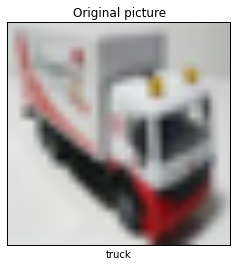

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

In [6]:
from hw3 import test_lenet

In [10]:
test_lenet(batch_size=25, n_epochs=5)

test_lenet: {'nhidden': [4096, 512], 'learning_rate': 0.1, 'flipping': False, 'batch_size': 25, 'n_epochs': 5, 'translation': False, 'rotation': False, 'nkerns': [32, 64]}
../data/cifar-10-batches-mat/data_batch_1.mat
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
400
... building the model
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
Test model compiled...
Validate model compiled...
Train model compiled...
MyMLP
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
training @ iter =  0
epoch 1, minibatch 16/16, validation error 70.000000 %
     epoch 1, minibatch 1

The training process for function test_lenet ran for 0.05m


### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

In [4]:
from hw3_utils import load_data
from hw3 import translate_image

Implement the neural network with this augmentation, show the improvement

In [11]:
from hw3 import test_lenet_translation

test_lenet: {'nhidden': [4096, 512], 'learning_rate': 0.1, 'flipping': False, 'batch_size': 25, 'n_epochs': 5, 'translation': True, 'rotation': False, 'nkerns': [32, 64]}
../data/cifar-10-batches-mat/data_batch_1.mat
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
400
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ... building the model
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
Test model compiled...
Validate model compiled...
Train model compiled...
MyMLP
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
training @ iter =  0
epo

The training process for function test_lenet ran for 0.09m


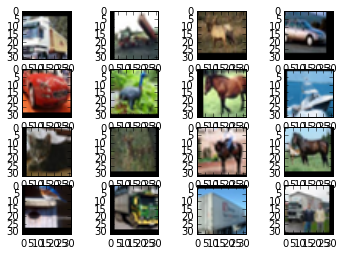

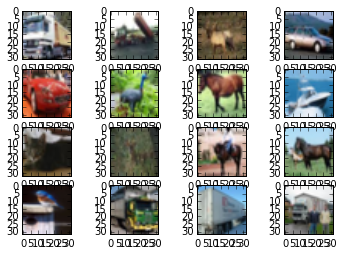

In [12]:
test_lenet_translation(batch_size=25, n_epochs=5)

### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

In [13]:
from hw3_utils import load_data
from hw3 import rotate_image

Implement the neural network with this augmentation, show the improvement

In [15]:
from hw3 import test_lenet_rotation

test_lenet: {'nhidden': [4096, 512], 'learning_rate': 0.1, 'flipping': False, 'batch_size': 25, 'n_epochs': 5, 'translation': False, 'rotation': True, 'nkerns': [32, 64]}
../data/cifar-10-batches-mat/data_batch_1.mat
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
400
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ... building the model
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
Test model compiled...
Validate model compiled...
Train model compiled...
MyMLP
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
training @ iter =  0
epo

The training process for function test_lenet ran for 0.09m


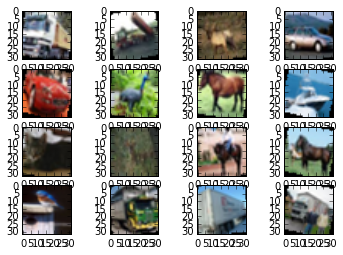

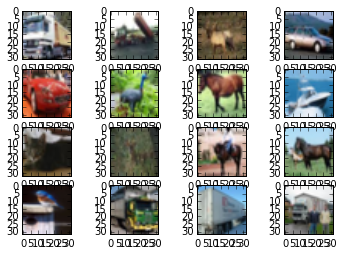

In [16]:
test_lenet_rotation(batch_size=25, n_epochs=5)

### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

In [17]:
from hw3_utils import load_data
from hw3 import flip_image

Implement the neural network with this augmentation, show the improvement

In [18]:
from hw3 import test_lenet_flip

test_lenet: {'nhidden': [4096, 512], 'learning_rate': 0.1, 'flipping': True, 'batch_size': 25, 'n_epochs': 5, 'translation': False, 'rotation': False, 'nkerns': [32, 64]}
../data/cifar-10-batches-mat/data_batch_1.mat
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
loaded a matrix of shape (100, 3072)
400
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ... building the model
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
Test model compiled...
Validate model compiled...
Train model compiled...
MyMLP
LeNetConvPoolLayer L2_sqr:16.7694549561
LeNetConvPoolLayer L2_sqr:86.0168075562
HiddenLayer L2_sqr:2950.04248047
HiddenLayer L2_sqr:910.473999023
LogisticRegression L2_sqr:0.0
training @ iter =  0
epo

The training process for function test_lenet ran for 0.10m


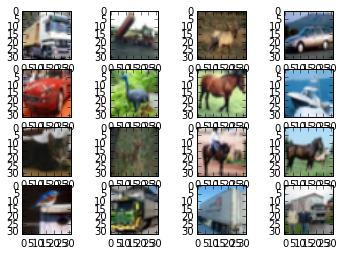

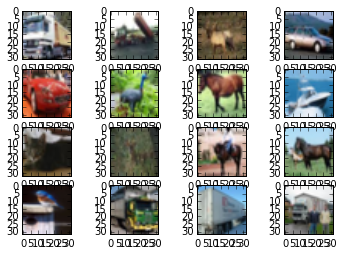

In [19]:
test_lenet_flip(batch_size=25, n_epochs=5)

### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

In [ ]:
from hw3_utils import load_data
from hw3 import noise_injection

Implement the neural network with this augmentation, show the improvement

In [ ]:
from hw3 import test_lenet_inject_noise_input

### Problem 3: Implement your own achritecture to achieve at least 80% testing accuracy on CIFAR-10 test set

In [ ]:
from hw3 import MY_lenet

### Problem 4: Implement the convolutional neural network depicted in this problem

In [ ]:
from hw3 import MY_CNN